### Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


Bad key axes.color_cycle in file /Users/esuabomdijemeni/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/ourstyle.mplstyle, line 3 ('axes.color_cycle: 19e7d8, e719ca, 191ce7, 101011, e51919, f0f214, 48f214, 1af033')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution


### Data Import

In [2]:
df_purchase = pd.read_csv('dataset/purchase_data.csv')

### Data Exploration

In [3]:
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


### Data Segmentation

#### Import Segmentation Model 

In [4]:
scaler = pickle.load(open('dataset/scaler.pickle','rb'))

In [5]:
pca = pickle.load(open('dataset/pca.pickle', 'rb'))

In [6]:
kmeans_pca = pickle.load(open('dataset/kmeans_pca.pickle','rb'))

In [7]:
kmeans_pca

KMeans(n_clusters=4, random_state=42)

### Standardization

In [8]:
features = df_purchase[['Sex','Marital status', 'Age','Education', 'Income','Occupation', 'Settlement size']]

In [9]:
df_purchase_segm_std = scaler.transform(features)

### PCA

In [10]:
df_purcchase_segm_pca = pca.transform(df_purchase_segm_std)

### K-means PCA

In [11]:
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purcchase_segm_pca)

In [12]:
df_purchase_predictors = df_purchase.copy()

In [13]:
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

### Descriptive Analysis by Segments

### Data Analysis by customer

In [14]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0


In [15]:
temp1 = df_purchase_predictors[['ID','Incidence']].groupby(['ID'], as_index = False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns = {'Incidence':'N_Visits'})
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [16]:
temp2 = df_purchase_predictors[['ID','Incidence']].groupby(['ID'], as_index = False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns = {'Incidence':'N_Purchases'})
temp3 = temp1.join(temp2)
temp3.head()

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [17]:
temp3['Average_N_Purchase'] = temp3['N_Purchases'] / temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchases,Average_N_Purchase
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [18]:
temp4 = df_purchase_predictors[['ID','Segment']].groupby(['ID'], as_index = False).mean()
temp4 = temp4.set_index('ID')
df_purchase_descr = temp3.join(temp4)

In [19]:
df_purchase_descr.head()

,N_Visits,N_Purchases,Average_N_Purchase,Segment
ID,,,,
200000001,101,9,0.089109,0
200000002,87,11,0.126437,3
200000003,97,10,0.103093,0
200000004,85,11,0.129412,0
200000005,111,13,0.117117,1


### Segment Proportions

In [65]:
segm_prop = df_purchase_descr[['N_Purchases', 'Segment']].groupby(['Segment']).count() / df_purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns = {'N_Purchase':'Segment Proportions'})
segm_prop

,N_Purchases
Segment,
0,0.378
1,0.222
2,0.206
3,0.194


Text(0.5, 1.0, 'Segment Proportions')

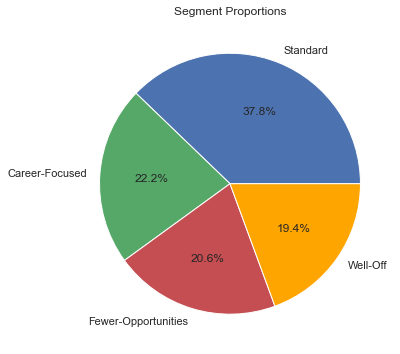

In [66]:
plt.figure(figsize=(9,6))
plt.pie(segm_prop['N_Purchases'], 
        labels = ['Standard', 'Career-Focused', 'Fewer-Opportunities','Well-Off'], 
        autopct = '%1.1f%%', 
        colors = ('b', 'g','r','orange'))
plt.title('Segment Proportions')

### Purchase Occasion and Purchase Incidence

In [22]:
segments_mean = df_purchase_descr.groupby(['Segment']).mean()
segments_mean

,N_Visits,N_Purchases,Average_N_Purchase
Segment,,,
0,113.894180,22.793651,0.201679
1,123.216216,39.603604,0.281944
2,117.699029,24.902913,0.212773
3,117.185567,34.731959,0.285639


In [25]:
segments_std = df_purchase_descr.groupby(['Segment']).std()
segments_std

,N_Visits,N_Purchases,Average_N_Purchase
Segment,,,
0,16.397308,13.803513,0.120305
1,44.730792,53.551552,0.199518
2,19.039605,16.774464,0.126603
3,20.794796,26.003011,0.172293


Text(0.5, 1.0, 'Average Number of Store Visits by Segment')

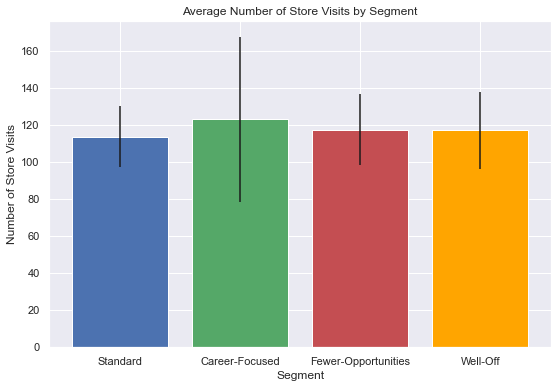

In [26]:
plt.figure(figsize = (9,6))
plt.bar(x = (0,1,2,3), 
        tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'),
        height = segments_mean['N_Visits'], 
        yerr = segments_std['N_Visits'], 
        color = ('b','g','r','orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Average Number of Store Visits by Segment')

Text(0.5, 1.0, 'Average Number of Purchase by Segment')

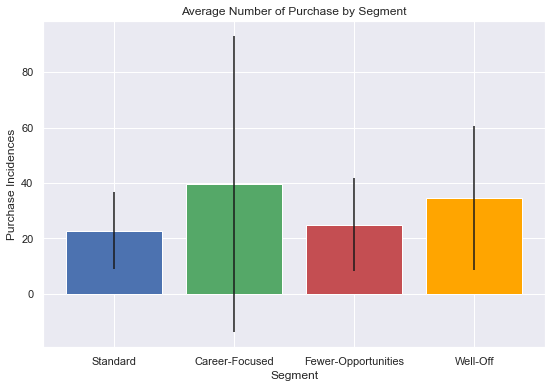

In [28]:
plt.figure(figsize = (9,6))
plt.bar(x = (0,1,2,3), 
        tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'),
        height = segments_mean['N_Purchases'], 
        yerr = segments_std['N_Purchases'], 
        color = ('b','g','r','orange'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Average Number of Purchase by Segment')

Text(0.5, 1.0, 'Average Number of Average Purchases by Segment')

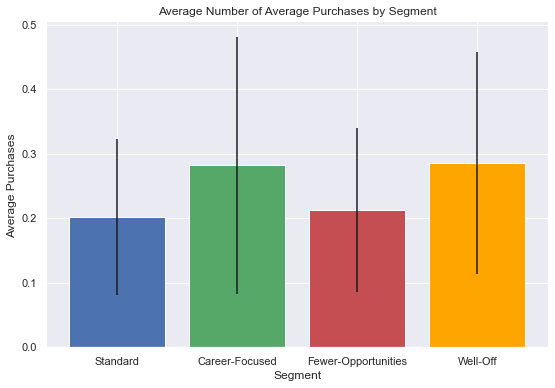

In [30]:
plt.figure(figsize = (9,6))
plt.bar(x = (0,1,2,3), 
        tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'),
        height = segments_mean['Average_N_Purchase'], 
        yerr = segments_std['Average_N_Purchase'], 
        color = ('b','g','r','orange'))
plt.xlabel('Segment')
plt.ylabel('Average Purchases ')
plt.title('Average Number of Average Purchases by Segment')

### Brand Choice

In [77]:
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence']==1]

In [78]:
df_purchase_incidence 

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,0,0,0,0,47,1,110866,1,0,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,0,1,0,0,47,1,110866,1,0,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,1,0,0,0,47,1,110866,1,0,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,0,0,0,0,47,1,110866,1,0,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,1,1,0,0,47,1,110866,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,0,0,0,0,42,1,120946,1,0,0
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,0,0,0,0,42,1,120946,1,0,0
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,0,0,0,0,42,1,120946,1,0,0
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,0,0,0,0,42,1,120946,1,0,0


In [79]:
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix = 'Brand', prefix_sep = '_')
brand_dummies['Segment'], brand_dummies['ID'] = df_purchase_incidence['Segment'], df_purchase_incidence['ID']
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,0,200000001
11,0,0,0,0,1,0,200000001
19,1,0,0,0,0,0,200000001
24,0,0,0,1,0,0,200000001
29,0,1,0,0,0,0,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,0,200000500
58648,1,0,0,0,0,0,200000500
58674,0,1,0,0,0,0,200000500
58687,0,1,0,0,0,0,200000500


In [80]:
df_purchase_incidence['Brand']

6        2
11       5
19       1
24       4
29       2
        ..
58621    2
58648    1
58674    2
58687    2
58691    2
Name: Brand, Length: 14638, dtype: int64

In [81]:
temp = brand_dummies.groupby(['ID'], as_index = True).mean()

In [82]:
mean_brand_choice = temp.groupby(['Segment'], as_index = True).mean()

In [83]:
mean_brand_choice

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
Segment,,,,,
0,0.137567,0.676957,0.021404,0.066358,0.097714
1,0.072215,0.152692,0.039616,0.111382,0.624095
2,0.251186,0.396502,0.156481,0.059474,0.136357
3,0.042361,0.118632,0.029988,0.610577,0.198442


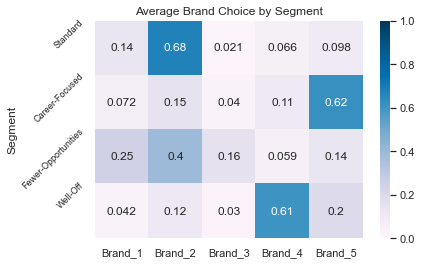

In [84]:
sns.heatmap(mean_brand_choice, 
            vmin =0, 
            vmax=1, 
            cmap='PuBu', 
            annot = True)

plt.yticks([0,1,2,3], ['Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'], rotation=45, fontsize = 9)
plt.title('Average Brand Choice by Segment')
plt.show()

### Revenue

In [85]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 1]
temp.loc[:,'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['Segment', 'Revenue Brand 1']] = temp[['Segment', 'Revenue Brand 1']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

/Users/esuabomdijemeni/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/esuabomdijemeni/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Segment,Revenue Brand 1
0,0,2258.90
1,1,736.09
2,2,2611.19
3,3,699.47


In [86]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 2]
temp.loc[:,'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 2']] = temp[['Segment', 'Revenue Brand 2']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

/Users/esuabomdijemeni/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/esuabomdijemeni/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Segment,Revenue Brand 1,Revenue Brand 2
0,0,2258.90,13909.78
1,1,736.09,1791.78
2,2,2611.19,4768.52
3,3,699.47,1298.23


In [87]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 3]
temp.loc[:,'Revenue Brand 3'] = temp['Price_3'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 3']] = temp[['Segment', 'Revenue Brand 3']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

/Users/esuabomdijemeni/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/esuabomdijemeni/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3
0,0,2258.90,13909.78,722.06
1,1,736.09,1791.78,664.75
2,2,2611.19,4768.52,3909.17
3,3,699.47,1298.23,725.54


In [88]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 4]
temp.loc[:,'Revenue Brand 4'] = temp['Price_4'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 4']] = temp[['Segment', 'Revenue Brand 4']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

/Users/esuabomdijemeni/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/esuabomdijemeni/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4
0,0,2258.90,13909.78,722.06,1805.59
1,1,736.09,1791.78,664.75,2363.84
2,2,2611.19,4768.52,3909.17,861.38
3,3,699.47,1298.23,725.54,14009.29


In [89]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 5]
temp.loc[:,'Revenue Brand 5'] = temp['Price_5'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 5']] = temp[['Segment', 'Revenue Brand 5']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

/Users/esuabomdijemeni/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/esuabomdijemeni/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5
0,0,2258.90,13909.78,722.06,1805.59,2214.82
1,1,736.09,1791.78,664.75,2363.84,19456.74
2,2,2611.19,4768.52,3909.17,861.38,2439.75
3,3,699.47,1298.23,725.54,14009.29,5509.69


In [90]:
segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Revenue Brand 1'] + 
                                           segments_brand_revenue['Revenue Brand 2'] + 
                                           segments_brand_revenue['Revenue Brand 3'] + 
                                           segments_brand_revenue['Revenue Brand 4'] + 
                                           segments_brand_revenue['Revenue Brand 5'])
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,2258.90,13909.78,722.06,1805.59,2214.82,20911.15
1,1,736.09,1791.78,664.75,2363.84,19456.74,25013.20
2,2,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
3,3,699.47,1298.23,725.54,14009.29,5509.69,22242.22


In [98]:
segments_brand_revenue['Segment Proportions'] = segm_prop['N_Purchases']
segments_brand_revenue['Segment'] = segments_brand_revenue['Segment'].map({0:'Fewer-Opportunities',
                                                                           1:'Career-Focussed', 
                                                                           2:'Standard', 
                                                                           3:'Well-Off' })
segments_brand_revenue['Segment'] = ['Fewer-Opportunities', 'Career-Focussed', 'Standard',  'Well-Off']
# segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])

In [100]:
segments_brand_revenue.set_index('Segment', inplace=True)

In [101]:
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Segment,,,,,,,
Fewer-Opportunities,2258.90,13909.78,722.06,1805.59,2214.82,20911.15,0.378
Career-Focussed,736.09,1791.78,664.75,2363.84,19456.74,25013.20,0.222
Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
Well-Off,699.47,1298.23,725.54,14009.29,5509.69,22242.22,0.194
